Business understanding
problem statement
data understanding

To perform data exploration, preprocessing, and predictive modeling, you will need to import several libraries in Python. Here are the necessary libraries:

In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


### Loading the dataset

In [559]:
# Importing the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")



### Data Exploration.

In [560]:
# Explore the structure of training_set_values
print(training_set_values.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [561]:
print(test_set_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [562]:
print(training_set_labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB
None


In [563]:
# Explore the first few rows of the dataset
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [564]:
test_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,04/02/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,04/02/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,01/02/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,22/01/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,27/03/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [565]:
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [566]:
# Summary statistics of numerical features
training_set_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [567]:
# Summary statistics of categorical features
training_set_values.describe(include=['object'])


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,15/03/2011,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


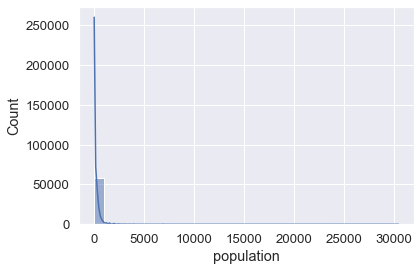

In [568]:
# Visualize distributions of numerical features
sns.histplot(data=training_set_values['population'], bins=30, kde=True)
plt.show()


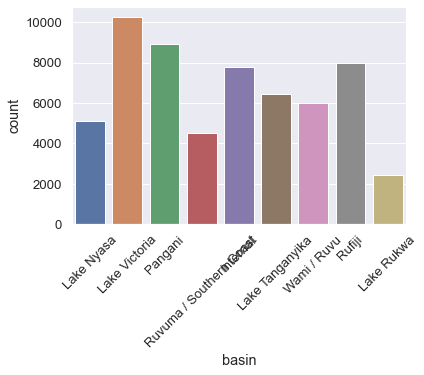

In [569]:
# Visualize distributions of categorical features
sns.countplot(data=training_set_values, x='basin')
plt.xticks(rotation=45)
plt.show()


### Handling Missing Values.

In [570]:
# Check for missing values
print(training_set_values.isnull().sum())


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [571]:
print(test_set_values.isnull().sum())

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

#### Handling Missing values for different categories.

In [572]:
import pandas as pd

def handle_missing_and_duplicates(data):
    # Display information about missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Handle missing values by dropping rows with missing values
    data.dropna(inplace=True)

    # Display information about duplicates
    print("\nDuplicate Rows:", data.duplicated().sum())

    # Handle duplicates by dropping duplicate rows
    data.drop_duplicates(inplace=True)

    return data

def clean_dataframes(training_set_values, test_set_values, training_set_labels):
    # Clean training set values
    print("\nCleaning Training Set Values:")
    training_set_values_cleaned = handle_missing_and_duplicates(training_set_values)

    # Clean test set values
    print("\nCleaning Test Set Values:")
    test_set_values_cleaned = handle_missing_and_duplicates(test_set_values)

    # Clean training set labels
    print("\nCleaning Training Set Labels:")
    # Drop rows in training_set_labels corresponding to missing values dropped in training_set_values
    training_set_labels_cleaned = training_set_labels.loc[training_set_labels.index.isin(training_set_values_cleaned.index)]

    return training_set_values_cleaned, test_set_values_cleaned, training_set_labels_cleaned

# Clean dataframes
training_set_values, test_set_values, training_set_labels= clean_dataframes(training_set_values, test_set_values, training_set_labels)

# Print shapes of cleaned dataframes to verify
print("Shape of cleaned training_set_values:", training_set_values.shape)
print("Shape of cleaned test_set_values:", test_set_values.shape)
print("Shape of cleaned training_set_labels:", training_set_labels.shape)



Cleaning Training Set Values:

Missing Values:
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type          

In [573]:
test_set_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6944 entries, 1 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6944 non-null   int64  
 1   amount_tsh             6944 non-null   float64
 2   date_recorded          6944 non-null   object 
 3   funder                 6944 non-null   object 
 4   gps_height             6944 non-null   int64  
 5   installer              6944 non-null   object 
 6   longitude              6944 non-null   float64
 7   latitude               6944 non-null   float64
 8   wpt_name               6944 non-null   object 
 9   num_private            6944 non-null   int64  
 10  basin                  6944 non-null   object 
 11  subvillage             6944 non-null   object 
 12  region                 6944 non-null   object 
 13  region_code            6944 non-null   int64  
 14  district_code          6944 non-null   int64  
 15  lga

#### Check for missing values in the dataset

In [574]:
### Dropping columns which are unnecessary.

columns_to_drop = ['wpt_name', 'num_private', 'subvillage', 'district_code', 'lga', 'ward', 
                   'public_meeting', 'recorded_by', 'scheme_name', 'extraction_type_group', 
                   'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 
                   'quantity_group', 'source_type', 'source_class', 'waterpoint_type']

# Drop the specified columns
training_set_values.drop(columns=columns_to_drop, inplace=True)


In [575]:
remaining_columns = training_set_values.columns
print(remaining_columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'population', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type_group'],
      dtype='object')


## Feature Engineering.

In [576]:
# Calculate the age of the waterpoint
current_year = pd.Timestamp.now().year
training_set_values['age'] = current_year - training_set_values['construction_year']

# Drop the 'construction_year' column
training_set_values.drop(columns=['construction_year'], inplace=True)



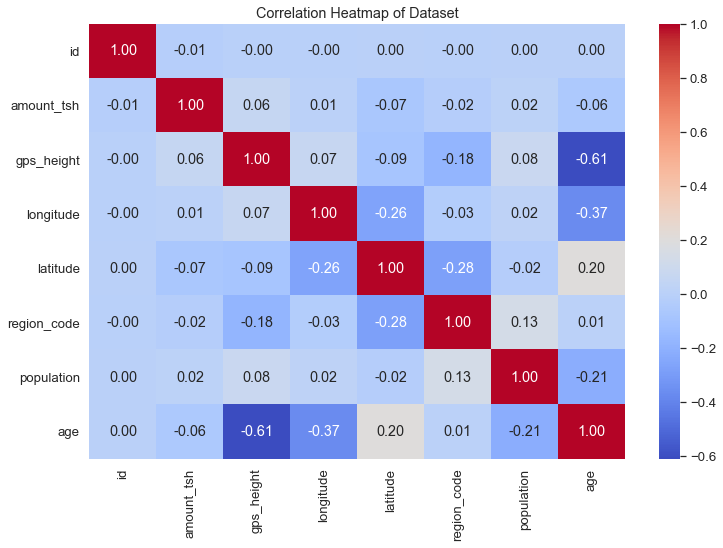

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the dataset
plt.figure(figsize=(12, 8))
sns.heatmap(training_set_values.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')
plt.show()


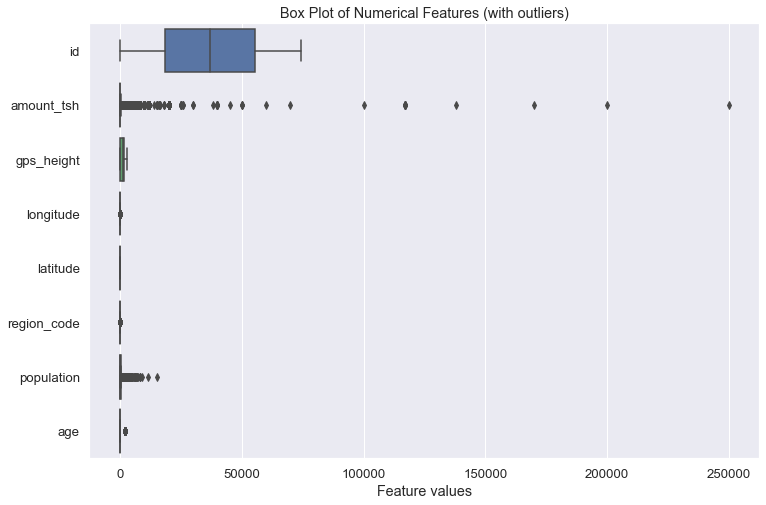

In [578]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numerical features
numerical_features = training_set_values.select_dtypes(include=['int64', 'float64'])

# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features, orient='h')
plt.title('Box Plot of Numerical Features (with outliers)')
plt.xlabel('Feature values')
plt.show()


##### Categorical Columns (e.g., funder, installer, basin, etc.):
For categorical columns, we'll encode them using one-hot encoding to convert them into a format suitable for machine learning algorithms.
In the provided code we'll use OneHotEncoder from scikit-learn to encode categorical columns into binary vectors.This will create binary columns for each category within each categorical feature.

In [579]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Encoding categorical columns using OneHotEncoder (as you've done before)
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(training_set_values[categorical_columns])

# Get the encoded column names
encoded_column_names = []
for i, column in enumerate(encoder.categories_):
    for category in column:
        encoded_column_names.append(f"{categorical_columns[i]}_{category}")

# Convert the encoded categorical data back to a DataFrame with custom column names
encoded_categorical_df = pd.DataFrame.sparse.from_spmatrix(encoded_categorical, columns=encoded_column_names)

# Extract numerical features
numerical_features = training_set_values.select_dtypes(include=['int64', 'float64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Convert the scaled features back to a DataFrame
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

# Concatenate the scaled numerical features DataFrame with the encoded categorical features
training_set_values_scaled = pd.concat([encoded_categorical_df, scaled_numerical_features_df], axis=1)

# Display the concatenated DataFrame
print(training_set_values_scaled)


       funder_0  funder_A/co Germany  funder_Abasia  funder_Abd  funder_Abdul  \
0           0.0                  0.0            0.0         0.0           0.0   
1           0.0                  0.0            0.0         0.0           0.0   
2           0.0                  0.0            0.0         0.0           0.0   
3           0.0                  0.0            0.0         0.0           0.0   
4           0.0                  0.0            0.0         0.0           0.0   
...         ...                  ...            ...         ...           ...   
27808       0.0                  0.0            0.0         0.0           0.0   
27809       0.0                  0.0            0.0         0.0           0.0   
27810       0.0                  0.0            0.0         0.0           0.0   
27811       0.0                  0.0            0.0         0.0           0.0   
27812       0.0                  0.0            0.0         0.0           0.0   

       funder_Aco/germany  

In [580]:
# Replace 'True' and 'False' with 1 and 0, respectively, for boolean columns
training_set_values['permit'] = training_set_values['permit'].map({True: 1, False: 0})

# Concatenate the 'permit' column with the other features
training_set_values_scaled['permit'] = training_set_values['permit']

print(training_set_values_scaled)


       funder_0  funder_A/co Germany  funder_Abasia  funder_Abd  funder_Abdul  \
0           0.0                  0.0            0.0         0.0           0.0   
1           0.0                  0.0            0.0         0.0           0.0   
2           0.0                  0.0            0.0         0.0           0.0   
3           0.0                  0.0            0.0         0.0           0.0   
4           0.0                  0.0            0.0         0.0           0.0   
...         ...                  ...            ...         ...           ...   
27808       0.0                  0.0            0.0         0.0           0.0   
27809       0.0                  0.0            0.0         0.0           0.0   
27810       0.0                  0.0            0.0         0.0           0.0   
27811       0.0                  0.0            0.0         0.0           0.0   
27812       0.0                  0.0            0.0         0.0           0.0   

       funder_Aco/germany  

In [581]:
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 59396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27813 non-null  int64 
 1   status_group  27813 non-null  object
dtypes: int64(1), object(1)
memory usage: 651.9+ KB


In [582]:

training_set_labels.drop(columns=['id'], inplace=True)

training_set_labels.head()

,status_group
0,functional
2,functional
5,functional
13,functional
14,functional


In [583]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
X = training_set_values_scaled  # This should be your feature matrix after scaling
y = training_set_labels  # This should be your target variable

In [584]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Handle Missing Values
# Using SimpleImputer to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X_imputed)

from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)





c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [585]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (27813, 1795)
Shape of y: (27813,)


In [586]:


# Split the data into training and validation sets with an 80/20 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the training features and target labels, respectively,
# while X_val and y_val contain the validation features and target labels, respectively.

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (22250, 1795)
Shape of X_val: (5563, 1795)
Shape of y_train: (22250,)
Shape of y_val: (5563,)


In [587]:
# Assuming X_train, y_train, and X_val have been properly preprocessed to handle missing values and other issues

# Initialize logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Predict the labels for validation set
y_pred = logistic_regression_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Calculate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.6875786446162143
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3209
           1       0.32      0.12      0.18       411
           2       0.65      0.58      0.61      1943

    accuracy                           0.69      5563
   macro avg       0.56      0.51      0.52      5563
weighted avg       0.67      0.69      0.67      5563

Confusion Matrix:
[[2656   65  488]
 [ 250   51  110]
 [ 781   44 1118]]


c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


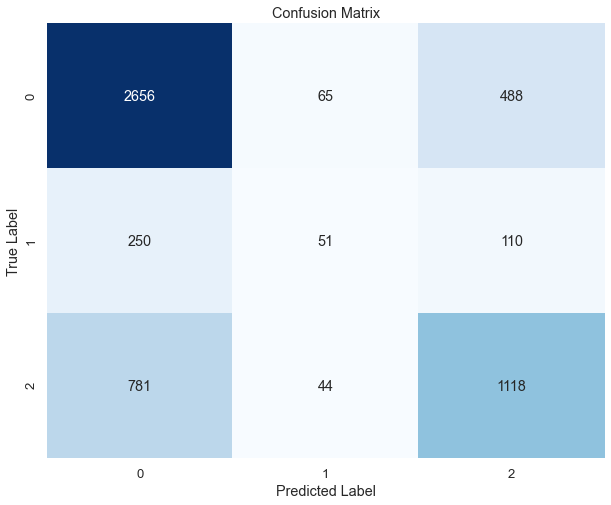

In [588]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Get class labels
class_labels = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [589]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (to avoid data leakage)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train your model on the resampled data
logistic_regression_model.fit(X_train_resampled, y_train_resampled)


c:\Users\RHYZEN\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

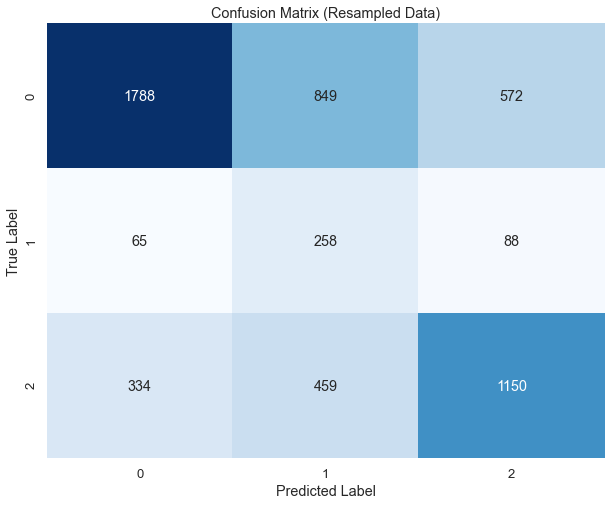

In [590]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate predictions using the logistic regression model trained on the resampled data
y_pred_resampled = logistic_regression_model.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [591]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the KNN model on the resampled data
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict the labels for validation data
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("Classification Report for KNN Model:")
print(classification_report(y_val, y_pred_knn))


Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      3209
           1       0.23      0.48      0.31       411
           2       0.64      0.65      0.65      1943

    accuracy                           0.65      5563
   macro avg       0.55      0.60      0.56      5563
weighted avg       0.70      0.65      0.67      5563



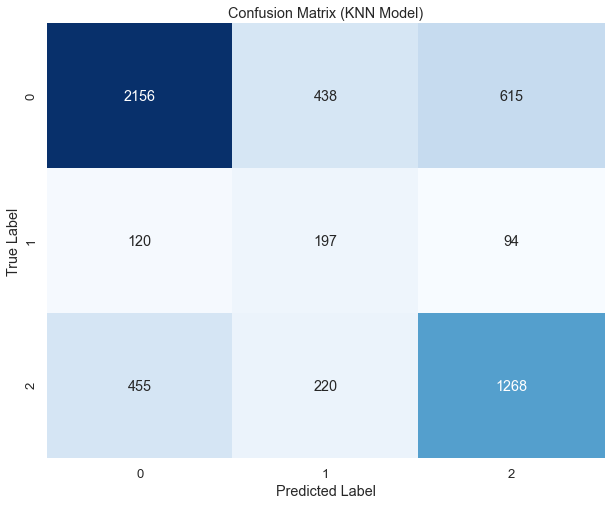

In [592]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_val, y_pred_knn)

# Get class labels
class_labels_knn = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_knn, yticklabels=class_labels_knn)
plt.title('Confusion Matrix (KNN Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [593]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_knn)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred_knn, average='weighted')
recall = recall_score(y_val, y_pred_knn, average='weighted')
f1 = f1_score(y_val, y_pred_knn, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6509077835700162
Precision: 0.6964319030646369
Recall: 0.6509077835700162
F1-score: 0.667698775789908
